In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("heart_disease - Heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


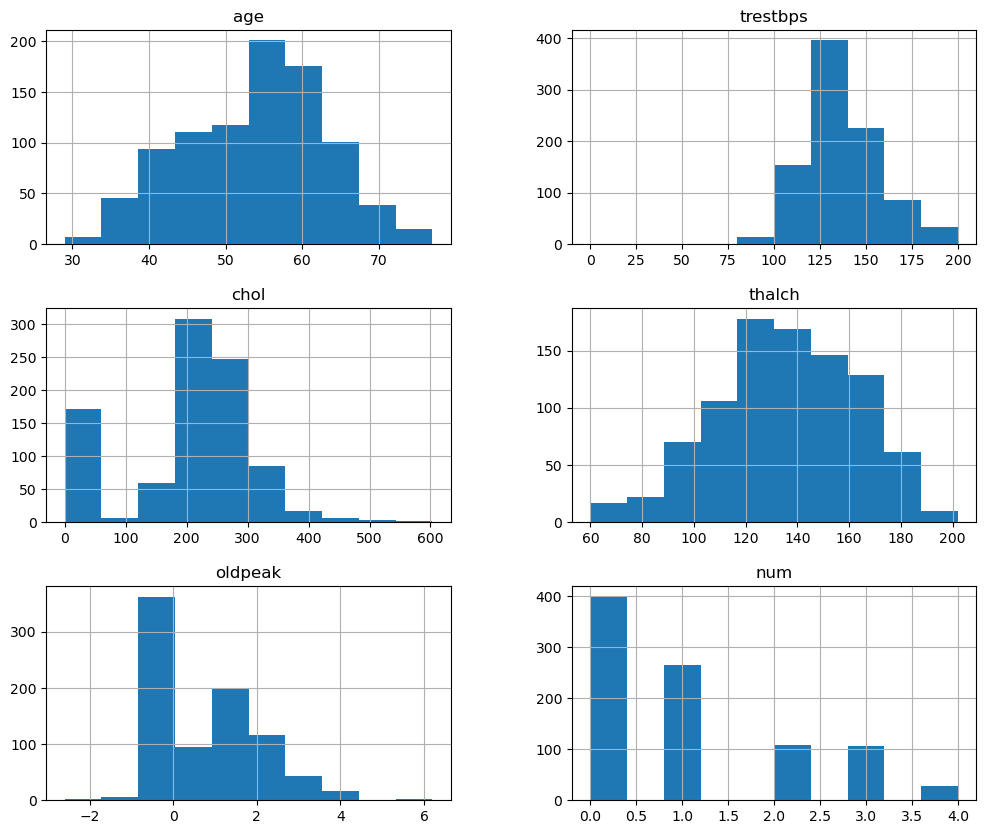

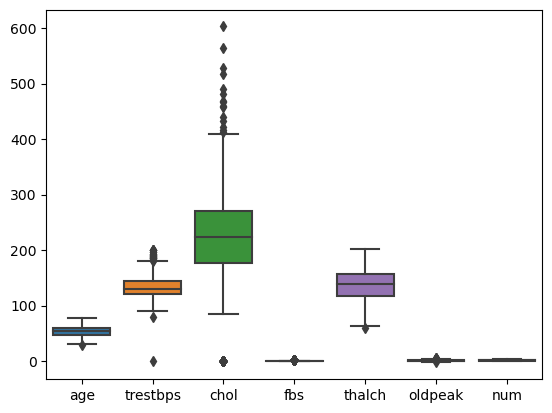

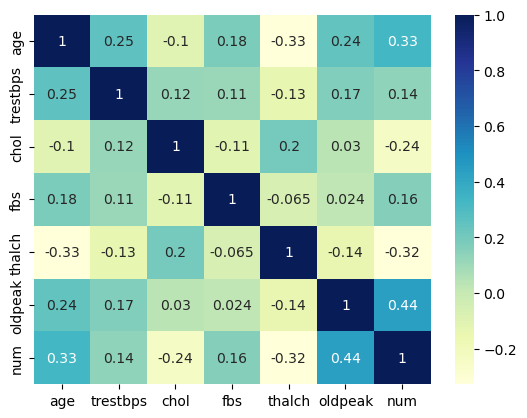

In [8]:
# Check for missing values
print(df.isnull().sum())

# Histograms
df.hist(figsize=(12,10))
plt.show()

# Box plots
sns.boxplot(data=df)
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()


In [15]:
df

,age,trestbps,chol,thalch,exang,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,fbs_True,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1.006027,0.567394,0.281297,0.524183,FALSE,1.288612,0,0,1,0,...,1,1,0,0,1,0,0,1,0,0
1,-1.397560,0.076967,0.013526,-0.147705,FALSE,-0.815249,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,0.350503,0.322181,-0.084656,0.449529,FALSE,-0.449360,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
3,-0.195767,-0.756760,-0.138211,2.017268,FALSE,-0.815249,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4,0.350503,-1.149102,-0.004325,-0.371668,TRUE,0.556834,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,-0.413461,-1.798388,-0.595631,FALSE,0.556834,4,0,1,1,...,0,0,1,0,0,0,1,0,0,1
904,0.896773,1.597292,-0.281021,-0.595631,TRUE,1.928917,4,0,1,1,...,0,0,0,1,0,1,0,0,1,0
905,0.241249,1.793463,-1.798388,-0.483649,TRUE,1.471556,4,0,1,0,...,0,1,0,0,1,0,0,0,0,1
906,0.241249,0.518352,0.058155,-1.155538,TURE,NaN,4,0,1,0,...,1,0,0,1,1,0,0,1,0,0


In [10]:
# Feature engineering - encoding categorical variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'slope', 'thal'])

scaler = StandardScaler()
df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']] = scaler.fit_transform(df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']])


In [17]:
# Convert boolean values to numeric (True/False or 1/0)
df['exang'] = df['exang'].map({'TRUE': 1, 'FALSE': 0})

# Split the dataset into features (X) and target variable (y)
X = df.drop('num', axis=1)
y = df['num']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Decision Tree Classification
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)



In [25]:
# Hyperparameter tuning using GridSearchCV


# Define the grid of parameters to search
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

# Use the best parameters to train a new model
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

Accuracy: 0.5439560439560439
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        89
           1       0.40      0.44      0.42        48
           2       0.24      0.18      0.21        22
           3       0.06      0.06      0.06        17
           4       0.00      0.00      0.00         6

    accuracy                           0.54       182
   macro avg       0.29      0.30      0.29       182
weighted avg       0.51      0.54      0.53       182

Confusion Matrix:
[[73 11  4  1  0]
 [16 21  4  7  0]
 [ 3  8  4  6  1]
 [ 3 10  3  1  0]
 [ 1  2  2  1  0]]


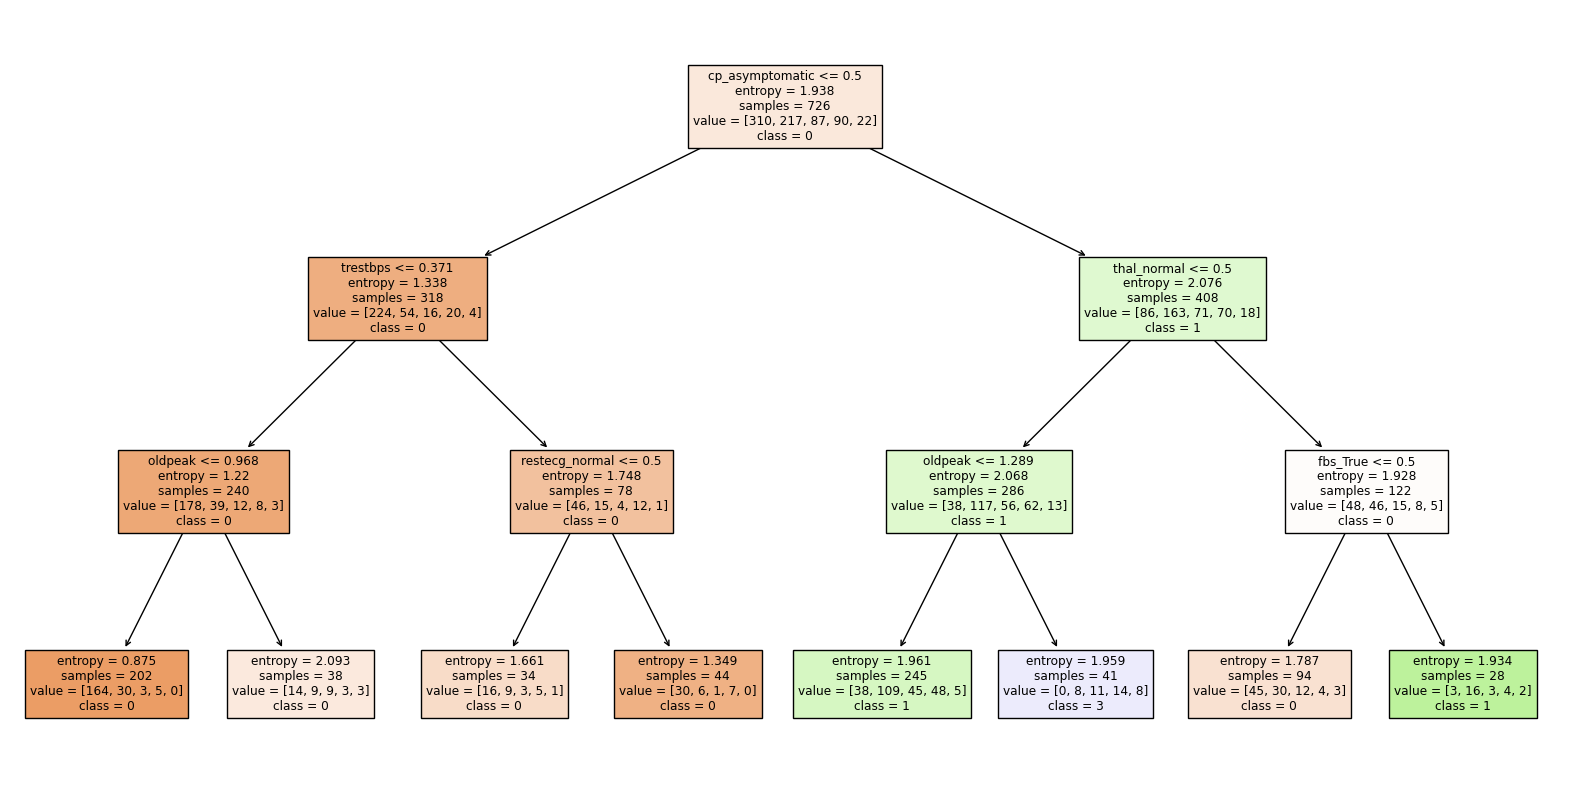

In [33]:
# Model evaluation

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree structure
# Convert the Index object to a list
feature_names = list(X.columns)

# Get unique class names from the target variable as a list
class_names = list(y.unique().astype(str))

# Visualize the decision tree structure
plt.figure(figsize=(20,10))
plot_tree(best_clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()
